In [1]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv("data/sample.csv")

In [13]:
candidate = data.copy()

In [14]:
x = candidate.copy()

In [15]:
y = x.pop("target")

In [4]:
rforest = RandomForestRegressor(
        n_estimators=1000, max_depth=7, n_jobs=-1, random_state=42
    )

In [8]:
forest_rmses = -cross_val_score(rforest, x, y,
                              scoring="neg_root_mean_squared_error", cv=10)

In [11]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.377062
std       0.674584
min       0.865132
25%       0.998881
50%       1.117212
75%       1.352238
max       3.080883
dtype: float64

In [17]:
candidate = data.copy()
candidate["id"] = 1.0
x = candidate.copy()
y = x.pop("target")
forest_rmses = -cross_val_score(rforest, x, y,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.377783
std       0.674133
min       0.866517
25%       0.999787
50%       1.115768
75%       1.356892
max       3.078832
dtype: float64

In [5]:

candidate = data.copy()
candidate["id"] = 1.0
for col in data.columns:
    if col!="id" and col!="target":
        candidate = data.copy()
        candidate["id"] = 1.0
        candidate[col] = 1.0
        print(col)
        x = candidate.copy()
        y = x.pop("target")
        forest_rmses = -cross_val_score(rforest, x, y,
                                    scoring="neg_root_mean_squared_error", cv=10)
        print(pd.Series(forest_rmses).describe())

O2_1
count    10.000000
mean      1.582990
std       0.679315
min       1.077362
25%       1.290787
50%       1.341033
75%       1.490163
max       3.361718
dtype: float64
O2_2
count    10.000000
mean      1.482172
std       0.670437
min       0.869975
25%       1.028665
50%       1.252096
75%       1.650368
max       3.081888
dtype: float64
O2_3
count    10.000000
mean      1.377815
std       0.673850
min       0.864836
25%       1.002101
50%       1.115838
75%       1.355105
max       3.079257
dtype: float64
O2_4
count    10.000000
mean      1.380968
std       0.674579
min       0.869645
25%       1.001960
50%       1.121669
75%       1.358101
max       3.085672
dtype: float64
O2_5
count    10.000000
mean      1.376891
std       0.672405
min       0.865630
25%       1.000433
50%       1.118303
75%       1.350894
max       3.075509
dtype: float64
O2_6
count    10.000000
mean      1.374906
std       0.674165
min       0.864288
25%       1.000574
50%       1.116932
75%       1.345203
ma

In [6]:
"BOD5_5"
candidate = data.copy()
candidate["id"] = 1.0
candidate["BOD5_5"] = 1.0
x = candidate.copy()
y = x.pop("target")
forest_rmses = -cross_val_score(rforest, x, y,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.354773
std       0.604603
min       0.876626
25%       1.056094
50%       1.161743
75%       1.234513
max       2.853593
dtype: float64

In [11]:
candidate.to_csv("data/bod55.csv",index=False)

In [10]:
candidate.shape

(3500, 37)

<Axes: xlabel='BOD5_5', ylabel='target'>

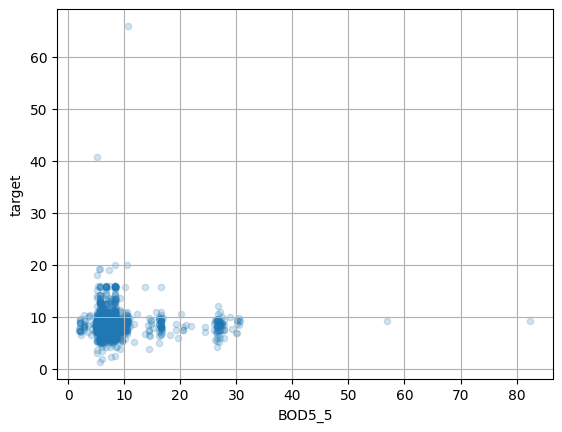

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
data.plot(kind="scatter", x="BOD5_5", y="target", grid=True, alpha=0.2)

In [13]:
data.columns

Index(['id', 'target', 'O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7',
       'NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7', 'NO2_1',
       'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7', 'NO3_1', 'NO3_2',
       'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7', 'BOD5_1', 'BOD5_2',
       'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7'],
      dtype='object')

<Axes: xlabel='O2_1', ylabel='target'>

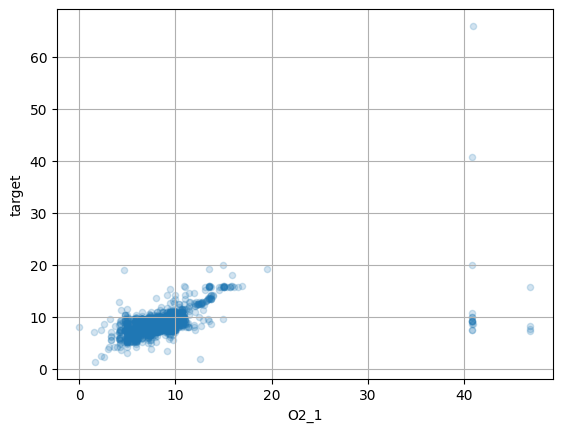

In [14]:
data.plot(kind="scatter", x="O2_1", y="target", grid=True, alpha=0.2)

In [15]:
data.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


In [21]:
def removing_outliers(df,col, df2):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return df2[(df2[col]<=upper_limit) & (df2[col]>=lower_limit)]

In [22]:
candidate = data.copy()
candidate["id"] = 1.0
for col in candidate.columns:
    if col not in ["id","target"]:
        candidate = removing_outliers(data,col,candidate)

In [23]:
candidate.shape

(236, 37)